# pyhf hello world

Ryan Reece <https://github.com/rreece>        
created: 2020-07-09

In [1]:
import math
import numpy as np
import pyhf

import hepplot as hep

## Setup input data

In [2]:
bins = list(range(6))
y = [ [9,8,6,4,1], [12,10,7,2,2], [6,10,8,5,2] ]
labels = ['A','B','C']
data = [26, 30, 19, 12, 6]
data_label='Data'
signal_grid = {
    (0.1,): [0.3, 2.6, 1.7, 1.1, 0.5],
    (0.2,): [0.2, 1.7, 2.8, 1.4, 0.6],
    (0.3,): [0.1, 0.7, 1.2, 3.5, 1.8],
    (0.4,): [0.0, 0.4, 1.1, 1.6, 4.5],
}
signal_labels = [r'$s_1$', r'$s_2$', r'$s_3$', r'$s_4$']

ytotal  = [sum(i) for i in zip(*y)]
signals = list(signal_grid.values())
signal_points = list(signal_grid.keys())

## gaussian errors
yerr    = [
    0.2*math.sqrt(_y) for _y in ytotal
]
yerrs   = [
    [0.1*math.sqrt(_y) for _y in y_i] for y_i in y
]

## asymmetric errors
#yerr    = [
#    [0.2*hep.stats.poisson_error_up(_y), 0.2*hep.stats.poisson_error_down(_y)] for _y in ytotal
#]
#yerrs   = [
#    [[0.3*math.sqrt(_y), 0.2*math.sqrt(_y)] for _y in y_i] for y_i in y
#]

In [3]:
signal_points

[(0.1,), (0.2,), (0.3,), (0.4,)]

## Histograms

DEBUG: ytotal total_mean =  1.8369565217391304


(<Figure size 720x720 with 2 Axes>,
 [<AxesSubplot:ylabel='Events / (1 GeV)'>,
  <AxesSubplot:xlabel='$p_\\mathrm{T}$  [GeV]'>])

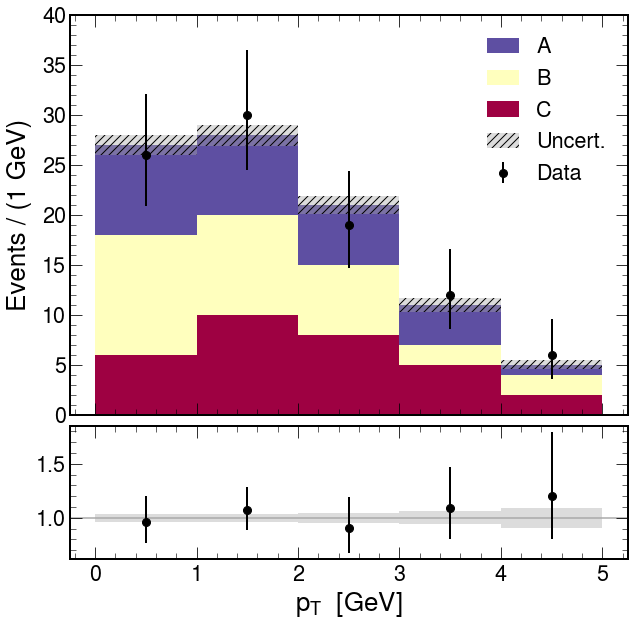

In [4]:
hep.plot.hist1d(bins, y,
                yerr=yerr,
                labels=labels,
                data=data,
                data_label=data_label,
                xlabel='$p_\mathrm{T}$  [GeV]',
                ylabel='Events / (1 GeV)',
                ylim=(0.0, 40.0),
                ratio=True)

DEBUG: ytotal total_mean =  1.8369565217391304


(<Figure size 720x720 with 2 Axes>,
 [<AxesSubplot:ylabel='Events / (1 GeV)'>,
  <AxesSubplot:xlabel='$p_\\mathrm{T}$  [GeV]'>])

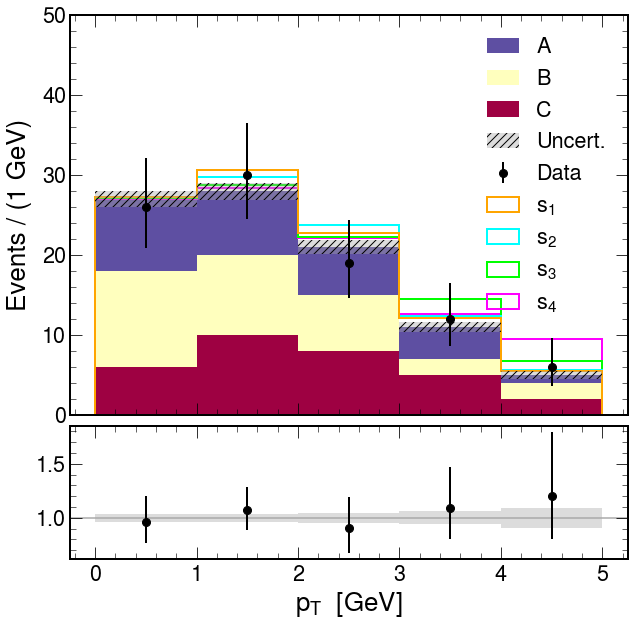

In [5]:
hep.plot.hist1d(bins, y,
                yerr=yerr,
                labels=labels,
                data=data,
                data_label=data_label,
                signals=signals,
                signal_labels=signal_labels,
                xlabel='$p_\mathrm{T}$  [GeV]',
                ylabel='Events / (1 GeV)',
                ylim=(0.0, 50.0),
                ratio=True)

## Hypothesis testing with pyhf

### TODO:

-   Explain `pyhf.simplemodels.hepdata_like`
    -   Marked Poisson
    -   Cranmer, K. et al. (2012). HistFactory: A tool for creating statistical models for use with RooFit and RooStats. CERN-OPEN-2012-016. <https://cds.cern.ch/record/1456844>

## Basic hypothesis test at mu=1.0

In [6]:
list_of_results = list()
for i_signal, signal in enumerate(signals):
    print('Testing signal %i' % (i_signal+1))
    pdf = hep.stats.make_pdf(bkg_data=ytotal, bkg_uncerts=yerr, signal_data=signal)
    CLs_obs, CLs_exp_band = hep.stats.hypo_test(pdf=pdf, data=data, mu=1.0)
    results = dict()
    results['pdf'] = pdf
    results['CLs_obs'] = CLs_obs
    results['CLs_exp_band'] = CLs_exp_band
    list_of_results.append(results)
    print('Expected CLs -2 sigma: %.4f' % (CLs_exp_band[0]))
    print('Expected CLs -1 sigma: %.4f' % (CLs_exp_band[1]))
    print('Expected CLs         : %.4f' % (CLs_exp_band[2]))
    print('Expected CLs +1 sigma: %.4f' % (CLs_exp_band[3]))
    print('Expected CLs +2 sigma: %.4f' % (CLs_exp_band[4]))
    print('Observed CLs         : %.4f' % (CLs_obs))
    print('')

Testing signal 1
Expected CLs -2 sigma: 0.1514
Expected CLs -1 sigma: 0.2796
Expected CLs         : 0.4826
Expected CLs +1 sigma: 0.7334
Expected CLs +2 sigma: 0.9238
Observed CLs         : 0.5492

Testing signal 2
Expected CLs -2 sigma: 0.1097
Expected CLs -1 sigma: 0.2227
Expected CLs         : 0.4193
Expected CLs +1 sigma: 0.6849
Expected CLs +2 sigma: 0.9040
Observed CLs         : 0.4460

Testing signal 3
Expected CLs -2 sigma: 0.0284
Expected CLs -1 sigma: 0.0836
Expected CLs         : 0.2231
Expected CLs +1 sigma: 0.4916
Expected CLs +2 sigma: 0.8011
Observed CLs         : 0.3156

Testing signal 4
Expected CLs -2 sigma: 0.0053
Expected CLs -1 sigma: 0.0239
Expected CLs         : 0.0949
Expected CLs +1 sigma: 0.2988
Expected CLs +2 sigma: 0.6439
Observed CLs         : 0.1552



## Hypothesis test scan for a single signal

In [7]:
pdf = hep.stats.make_pdf(bkg_data=ytotal, bkg_uncerts=yerr, signal_data=signals[0])
mu_bounds = (0, 10)
test_size = 0.05
hypo_tests, test_mus = hep.stats.hypo_test_scan(pdf, 
                                               data, 
                                               mu_bounds=mu_bounds)

/home/ryan/at-github/statistics-notebooks/env1/lib/python3.8/site-packages/pyhf/infer/calculators.py:357: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


In [8]:
cls_obs = np.array([test[0] for test in hypo_tests]).flatten()
cls_exp = [np.array([test[1][i] for test in hypo_tests]).flatten() for i in range(5)]

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='$\\mu$', ylabel='CLs'>)

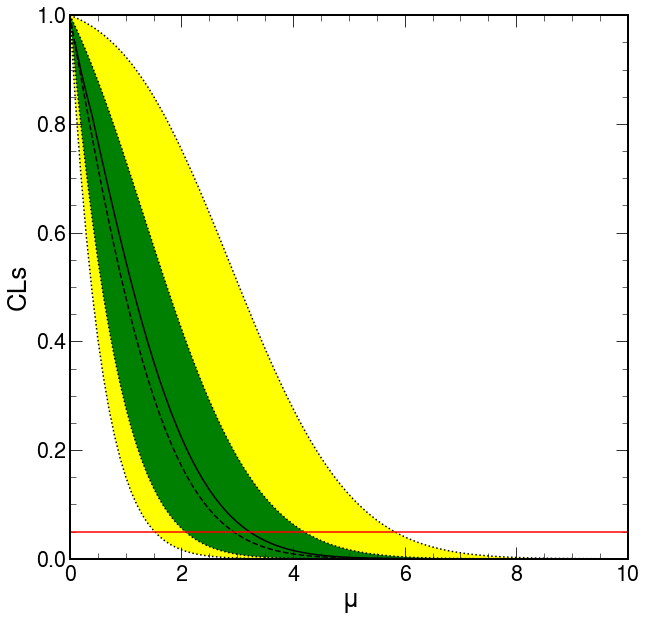

In [9]:
hep.plot.brazil(x=test_mus, exp=cls_exp, obs=cls_obs,
                xlabel=r'$\mu$',
                ylabel=r'CLs',
                xlim=mu_bounds,
                ylim=(0.0, 1.0),
                yline=test_size,
                )

In [10]:
hep.stats.invert_interval(hypo_tests, test_mus, test_size=test_size)

{'exp': [1.51963688665918,
  2.068018246850048,
  2.9296322031946,
  4.193857934619113,
  5.818638926683354],
 'obs': 3.217969015864237}

## Hypothesis test scan across signals

In [11]:
exclusions = list()
signal_ms = list()
for signal_point, signal in signal_grid.items():
    assert len(signal_point) == 1
    signal_ms.append(signal_point[0])
    pdf = hep.stats.make_pdf(bkg_data=ytotal, bkg_uncerts=yerr, signal_data=signal)
    hypo_tests, test_mus = hep.stats.hypo_test_scan(pdf, 
                                                   data, 
                                                   mu_bounds=(0, 10))
    exclusion = hep.stats.invert_interval(hypo_tests, test_mus)
    exclusions.append(exclusion)

/home/ryan/at-github/statistics-notebooks/env1/lib/python3.8/site-packages/pyhf/infer/calculators.py:357: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


In [12]:
exclusions

[{'exp': [1.51963688665918,
   2.068018246850048,
   2.9296322031946,
   4.193857934619113,
   5.818638926683354],
  'obs': 3.217969015864237},
 {'exp': [1.3176650031645012,
   1.7947426520179461,
   2.550978204182688,
   3.663854361972378,
   5.0995899135364695],
  'obs': 2.6574292344156722},
 {'exp': [0.8578147349890437,
   1.1774456156798303,
   1.6941796803813294,
   2.4817343250539263,
   3.530865154272336],
  'obs': 1.9618394685231535},
 {'exp': [0.589808666746554,
   0.8248674085693778,
   1.21278466820837,
   1.8270718462837436,
   2.6756157490178936],
  'obs': 1.420093454577902}]

In [13]:
cls_exp = [np.array([exc['exp'][i] for exc in exclusions]).flatten() for i in range(5)]
cls_obs = np.array([exc['obs'] for exc in exclusions]).flatten()

In [14]:
cls_obs

array([3.21796902, 2.65742923, 1.96183947, 1.42009345])

In [15]:
cls_exp

[array([1.51963689, 1.317665  , 0.85781473, 0.58980867]),
 array([2.06801825, 1.79474265, 1.17744562, 0.82486741]),
 array([2.9296322 , 2.5509782 , 1.69417968, 1.21278467]),
 array([4.19385793, 3.66385436, 2.48173433, 1.82707185]),
 array([5.81863893, 5.09958991, 3.53086515, 2.67561575])]

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='$\\theta$', ylabel='$\\mu\\ \\mathrm{excluded\\ at\\ 95\\%\\ CL}$'>)

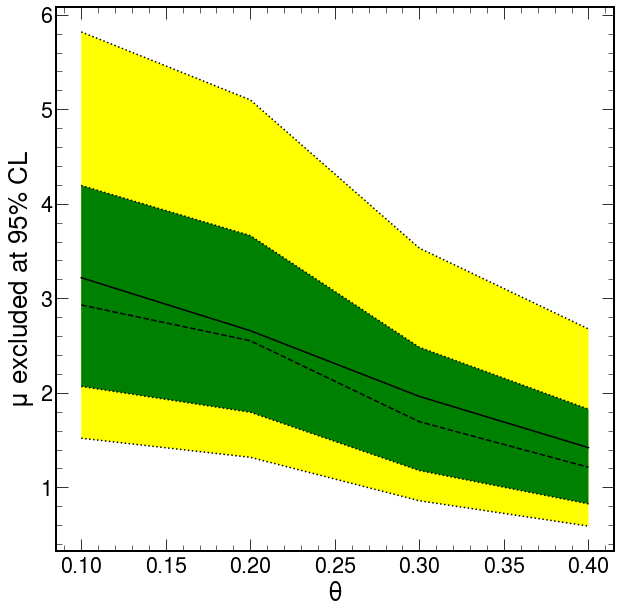

In [16]:
hep.plot.brazil(x=signal_ms, exp=cls_exp, obs=cls_obs,
                xlabel=r'$\theta$',
                ylabel=r'$\mu\ \mathrm{excluded\ at\ 95\%\ CL}$')

## TODO:

-   Revist conventions for storing results of hypo tests: `CLs_obs, CLs_exp_band`
-   Clean up function above for plotting mu excluded vs one theoretical param.
-   Write a function for plotting an exclusion contour in 2-D theoretical paramter space.
-   Write functions for showing hists pre and post fit.
-   Understand where all the implicit fitting is and document it.

## TODO: Learn about these

In [17]:
best_fit = pyhf.infer.mle.fit(data + pdf.config.auxdata, pdf)

In [18]:
best_fit

array([0.22253819, 0.99857551, 1.00261697, 0.9959344 , 1.00218284,
       0.99998247])

In [19]:
nominal = pdf.config.suggested_init()
background_only = pdf.config.suggested_init()
background_only[pdf.config.poi_index] = 0.0
best_fit = pyhf.infer.mle.fit(data + pdf.config.auxdata, pdf)

In [20]:
nominal

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [21]:
background_only

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [22]:
par_bounds = pdf.config.suggested_bounds()

In [23]:
par_bounds

[(0, 10),
 (1e-10, 10.0),
 (1e-10, 10.0),
 (1e-10, 10.0),
 (1e-10, 10.0),
 (1e-10, 10.0)]

In [24]:
unconpars = pyhf.infer.mle.fit(data + pdf.config.auxdata, pdf, nominal, par_bounds)
print("parameters post unconstrained fit: {}".format(unconpars))

parameters post unconstrained fit: [0.22253819 0.99857551 1.00261697 0.9959344  1.00218284 0.99998247]


In [25]:
conpars = pyhf.infer.mle.fixed_poi_fit(0.0, data + pdf.config.auxdata, pdf, nominal, par_bounds)
print("parameters post constrained fit: {}".format(conpars))

parameters post constrained fit: [0.         0.99857538 1.00274721 0.99633693 1.00349658 1.00769247]


In [26]:
pdf.expected_data(conpars)

array([ 26.96153525,  28.0769219 ,  20.92307555,  11.03846242,
         5.03846236, 674.03838113, 701.92304741, 523.07688875,
       275.96156049, 125.96155908])

In [27]:
pdf.config.poi_index

0

## See also

-   Cowan, G. et al. (2010). Asymptotic formulae for likelihood-based tests of new physics. https://arxiv.org/abs/1007.1727
-   Cranmer, K. et al. (2012). HistFactory: A tool for creating statistical models for use with RooFit and RooStats. CERN-OPEN-2012-016. <https://cds.cern.ch/record/1456844>
-   Heinrich, L., Feickert, M., & Stark, G. (2018). [pyhf](https://github.com/scikit-hep/pyhf). <https://scikit-hep.org/pyhf/>
-   Feickert, M. (2018). pyhf: a pure Python implementation of HistFactory with tensors and autograd. <https://indico.cern.ch/event/759480/>
-   <https://github.com/CoffeaTeam/coffea/blob/master/coffea/hist/plot.py>
-   <https://scikit-hep.org/pyhf/examples/notebooks/multichannel-coupled-histo.html>
-   <https://scikit-hep.org/pyhf/examples/notebooks/binderexample/StatisticalAnalysis.html>